In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammaln
from functools import partial

In [29]:
def partition_exp(kk, C):
    return C * kk - gammaln(kk+1)

In [26]:
def scatter(X, f_X):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.scatter(X, f_X)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')

    ax.spines['bottom'].set_color('white')
    ax.xaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')

    ax.spines['left'].set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='y', colors='white')

In [30]:
def plot_for_RC(R, C):
    partition_exp_part = partial(partition_exp, C=C)
    calc_partition = np.vectorize(partition_exp_part)
    
    X = np.arange(0, R+1)
    f_X = calc_partition(X)
    
    scatter(X, f_X) 

In [45]:
def find_the_sign_change(ls):
    for ii in range(len(ls)-1):
        if ls[ii] > 0 and ls[ii+1] < 0:
            return ii
    return -1
            

In [46]:
def calc_stats_RCs(R, Cs):
    R_zero = []
    min_val = []
    max_val = []
    
    for C in Cs:
        partition_exp_part = partial(partition_exp, C=C)
        calc_partition = np.vectorize(partition_exp_part)
        
        X = np.arange(0, R+1)
        f_X = calc_partition(X)
        
        min_val.append(min(f_X))
        max_val.append(max(f_X))
        R_zero.append(find_the_sign_change(f_X))
    
    return R_zero, min_val, max_val

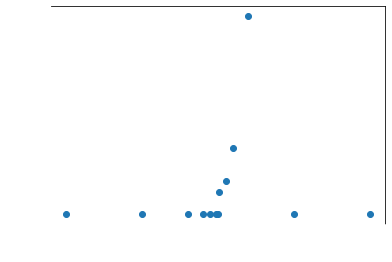

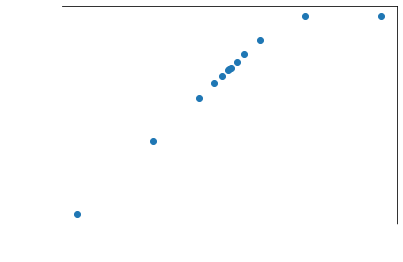

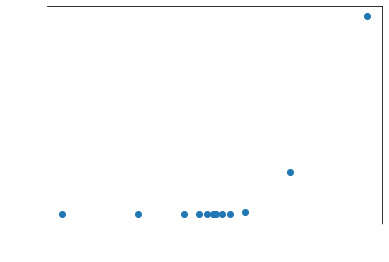

In [49]:
Cs = np.array([-10, -5, -2, -1, -0.5, -0.1, 0, 0.1, 0.5, 1, 2, 5, 10])
R = 100
R_zero, min_val, max_val = calc_stats_RCs(R, Cs)

scatter(Cs, R_zero)
scatter(Cs, min_val)
scatter(Cs, max_val)

In [48]:
print(max_val)

[-0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.1, 0.5, 1.3068528194400546, 636.2606244444365]
